# Text Classification

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X = newsgroups.data
y = newsgroups.target

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=4564)

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(xtrain)

In [ ]:
xtrain_seq = tokenizer.texts_to_sequences(xtrain)
xtest_seq = tokenizer.texts_to_sequences(xtest)

In [ ]:
xtrain_pad = pad_sequences(xtrain_seq, maxlen=500, padding='post')
xtest_pad = pad_sequences(xtest_seq, maxlen=500, padding='post')

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=500))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(newsgroups.target_names), activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(xtrain_pad, ytrain, epochs=5, batch_size=32,validation_data=(xtest_pad, ytest))

Epoch 1/5
413/413 [==============================] - 60s 145ms/step - loss: 0.9131 - accuracy: 0.7176 - val_loss: 0.8087 - val_accuracy: 0.7401
Epoch 2/5
413/413 [==============================] - 59s 144ms/step - loss: 0.5890 - accuracy: 0.8123 - val_loss: 0.4761 - val_accuracy: 0.8545
Epoch 3/5
413/413 [==============================] - 59s 142ms/step - loss: 0.4224 - accuracy: 0.8643 - val_loss: 0.3532 - val_accuracy: 0.8950
Epoch 4/5
413/413 [==============================] - 61s 149ms/step - loss: 0.3283 - accuracy: 0.8979 - val_loss: 0.3208 - val_accuracy: 0.8988
Epoch 5/5
413/413 [==============================] - 61s 148ms/step - loss: 0.2476 - accuracy: 0.9228 - val_loss: 0.2287 - val_accuracy: 0.9329


In [ ]:
import matplotlib.pyplot as plt

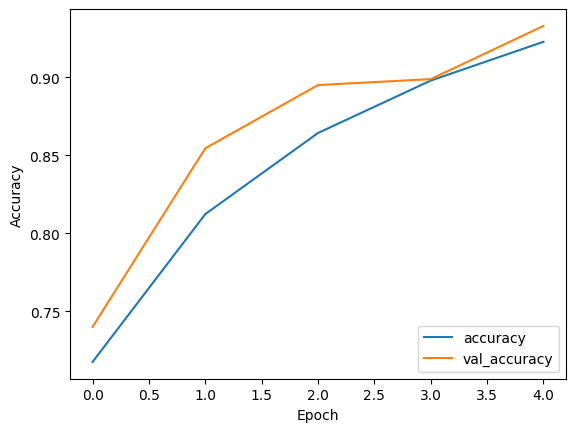

In [ ]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

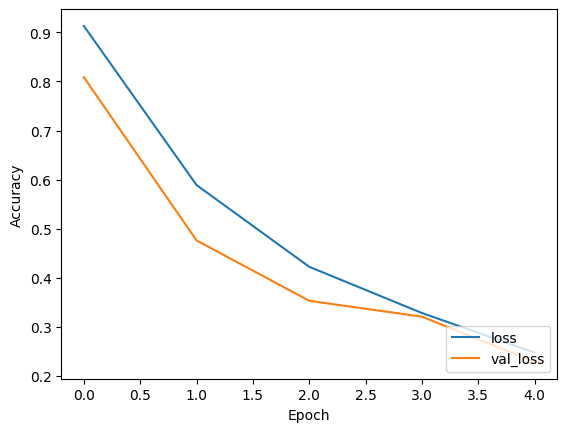

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')